# **Assignment - 4**

Import Libraries


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input,Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
import tensorflow
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences


Load Dataset

In [3]:
data = pd.read_csv('/content/spam.csv',delimiter=',',encoding='latin-1')
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
data


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Visualization


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

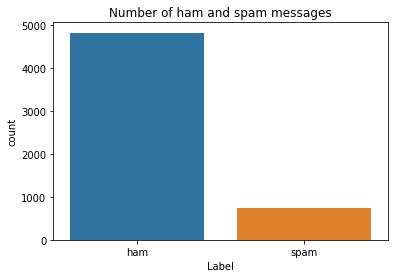

In [5]:
sns.countplot(data.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

Preprocessing

In [6]:
X = data.v2
Y = data.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)


In [7]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [8]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,
random_state=5)


In [10]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)


Model Creation

In [20]:
model=Sequential()
model.add(Embedding(max_words,50,input_length=max_len))
model.add(LSTM(64))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation ='sigmoid'))


Compile Model

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])


Fit Model

In [22]:
history = model.fit(sequences_matrix,Y_train,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
112/112 [==============================] - 13s 91ms/step - loss: 0.1781 - accuracy: 0.9377 - val_loss: 0.0572 - val_accuracy: 0.9854
Epoch 2/10
112/112 [==============================] - 10s 86ms/step - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0524 - val_accuracy: 0.9843
Epoch 3/10
112/112 [==============================] - 10s 87ms/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.0554 - val_accuracy: 0.9865
Epoch 4/10
112/112 [==============================] - 10s 91ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0557 - val_accuracy: 0.9865
Epoch 5/10
112/112 [==============================] - 11s 100ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0641 - val_accuracy: 0.9854
Epoch 6/10
112/112 [==============================] - 15s 132ms/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0729 - val_accuracy: 0.9809
Epoch 7/10
112/112 [==============================] - 10s 87ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0643 - val_accurac

Save Model

In [23]:
model.save('Spam-Detection-model.h5')

Test Model

In [30]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)
test_accuracy = model.evaluate(test_sequences_matrix,Y_test)
y_pred = model.predict(test_sequences_matrix)

35/35 [==============================] - 1s 20ms/step


In [25]:
model.metrics_names
['loss', 'accuracy']
print('Test Loss: {:0.4f} and Test Accuracy: {:0.2f}%'.format(test_accuracy[0],test_accuracy[1]*100))

Test Loss: 0.1215 and Test Accuracy: 97.94%


In [36]:
from sklearn.metrics import classification_report
target_names = ['ham', 'spam']
print(classification_report(Y_test, y_pred.round(), target_names=target_names))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       978
        spam       0.99      0.84      0.91       137

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

